# ML Batch B12

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Generate batches of tensor image data with real-time data augmentation.
import numpy as np
import pickle


In [2]:
gen = ImageDataGenerator()
batch_size = 2186

#Fetching Image ________

# Takes the path to a directory & generates batches of augmented data.

flow = gen.flow_from_directory("C:\\Users\\Alwaz\Desktop\\Image dataset\\", color_mode="rgb", target_size=(200, 200), batch_size=batch_size)
out = flow.next()

Found 2740 images belonging to 3 classes.


In [3]:
flow.class_indices

{'Foreigners image': 0, 'indian image': 1, 'non human images': 2}

In [4]:
X,y = out
print(X.shape)
print(y.shape)
X = X.reshape(X.shape[0],-1)
y =out[1].argmax(axis=1)
# The numpy.argmax() function returns indices of the max element of the array in a particular axis.

(2186, 200, 200, 3)
(2186, 3)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#  Reshaping _____

X_train=X_train.reshape(X_train.shape[0],-1)
X_test=X_test.reshape(X_test.shape[0],-1)

print("X_train shape :",X_train.shape)
print("y_train shape :",y_train.shape)
print("X_test shape :",X_test.shape)
print("y_test shape :",y_test.shape)

X_train shape : (1464, 120000)
y_train shape : (1464,)
X_test shape : (722, 120000)
y_test shape : (722,)


# Using SVM to train model


In [6]:
                #  SVC without GRIDsearch ______________________2
     
from sklearn.svm import SVC

#A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems.

from sklearn.metrics import accuracy_score
class_svc = SVC(kernel='linear', random_state=0)
class_svc.fit(X_train, y_train)

y_pred_svc = class_svc.predict(X_test)
print(str(round(accuracy_score(y_test,y_pred_svc)*100,2)) + " % For SVC without Grid Search") # SVC

61.91 % For SVC without Grid Search


# Using pickle to save Model

In [ ]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(class_svc, open(filename, 'wb'))


In [36]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Renaming Files



In [17]:
import os

# The OS module in Python provides functions for interacting with the operating system. OS comes under Python’s standard utility modules. This module provides a portable way of using operating system-dependent functionality
# list dir -  listdir() returns a list containing the names of the entries in the directory given by path.

def renamed_files(path, label):
    """
    Rename files so they can contain "test n", 

    Arguments:
    path -- path where images are located that will be renamed
    label -- the label the images will be get

    Output:
    files will be renamed in the same folder
    """
    i = 1

    for filename in os.listdir(path):
        try:
            f, extension = os.path.splitext(path+filename)
            src = path+filename
            dst = path+label+str(i)+extension
            os.rename(src, dst)
            i += 1

        except Exception as e:
            print(e)
            i += 1


path = "C:\\Users\\Alwaz\\Desktop\\Test set\\"
label = "test "

renamed_files(path, label)

# Loading Files in Bulk to Predict and Filter

In [11]:

import shutil
from keras.preprocessing import image


# LOADING image to Filter ________________

train_image = []

for i in range(1,50):
    try:
        
        img = image.load_img('{r}{u}{a}.jpg'.format(u=label,r=path,a=i), target_size=(200,200),color_mode = "rgb",interpolation='nearest')
        img = image.img_to_array(img)   # Converts a PIL Image instance to a Numpy array
        train_image.append(img)
    except Exception as e:
        print(e)
        continue
    r = np.array(img)
    r=r.reshape(1,-1)
    
    # Moving files from 'test set' to 'Filtered images' folder
    
    if loaded_model.predict(r) == 1:         # 1 is for Indian 
        original = r'C:\\Users\\Alwaz\\Desktop\\Test set\\test {a}.jpg'.format(a=i)
        target = r'C:\\Users\\Alwaz\\Desktop\\Filtered Image\\test {a}.jpg'.format(a=i)
        shutil.copyfile(original, target)

print("File is Filtered and moved to C:\\Users\\Alwaz\\Desktop\\Filtered Image")    

File is Filtered and moved to C:\Users\Alwaz\Desktop\Filtered Image


# Loading Single Image Manually to predict

Its Non human image


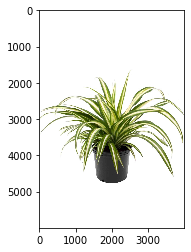

In [54]:
import tqdm 
import shutil
from keras.preprocessing import image


# LOADING image to Filter ________________

train_image = []

for i in range(1,2): # Used to test one image at a time
    try:
        
        img = image.load_img('C:\\Users\\Alwaz\\Desktop\\Individual Test set\\a ({a}).jpg'.format(a=i), target_size=(200,200),color_mode = "rgb",interpolation='nearest')
        img = image.img_to_array(img)   # Converts a PIL Image instance to a Numpy array
        train_image.append(img)
    except Exception as e:
        print(e)
        continue
    r = np.array(img)
    r=r.reshape(1,-1)
    
   # reading the image
    testImage = imgs.imread('C:\\Users\\Alwaz\\Desktop\\Individual Test set\\a ({a}).jpg'.format(a=i))
    plt.imshow(testImage)
    
    if loaded_model.predict(r) == 0:
        print("Its Foreigners image")
    if loaded_model.predict(r) == 1:
        print("Its Indian image")
    if loaded_model.predict(r) == 2:    
        print("Its Non human image")